In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_excel('/content/heart_disease.xlsx')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df['oldpeak'].unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [6]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
df['exang'].value_counts()

,count
exang,
False,516
True,337
TURE,36
FALSE,19


In [9]:
df['exang']=df['exang'].replace('TURE',True)

In [10]:
df['exang']=df['exang'].replace('FALSE',False)

/tmp/ipython-input-419786425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang']=df['exang'].replace('FALSE',False)


In [11]:
df['exang'].value_counts()

,count
exang,
False,535
True,373


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


<Axes: ylabel='oldpeak'>

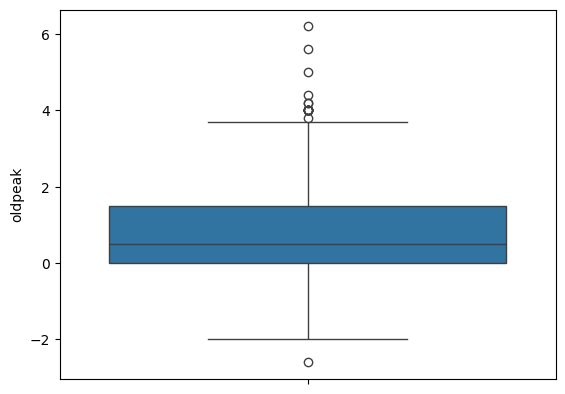

In [13]:
sns.boxplot(df['oldpeak'])

<Axes: ylabel='chol'>

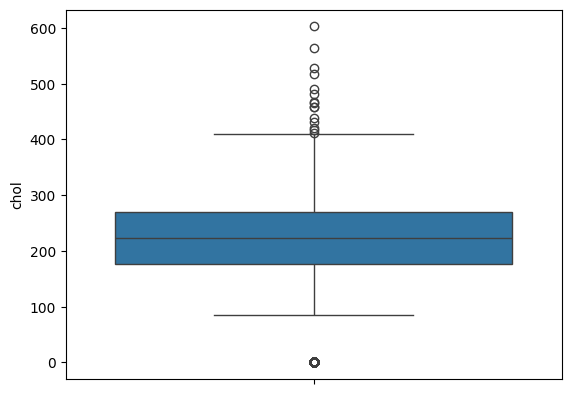

In [14]:
sns.boxplot(df['chol'])

<Axes: ylabel='thalch'>

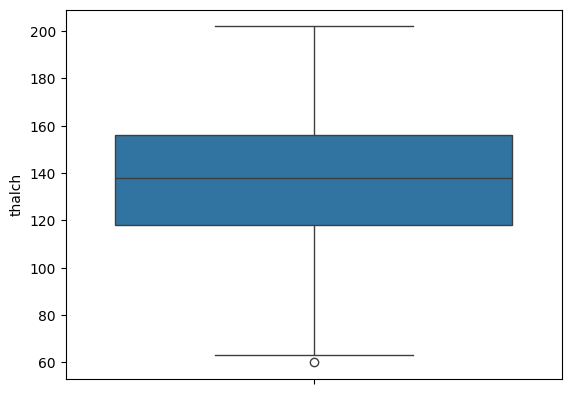

In [15]:
sns.boxplot(df['thalch'])

In [16]:
df['oldpeak'].mean()

np.float64(0.8912529550827422)

In [17]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())

<Axes: ylabel='oldpeak'>

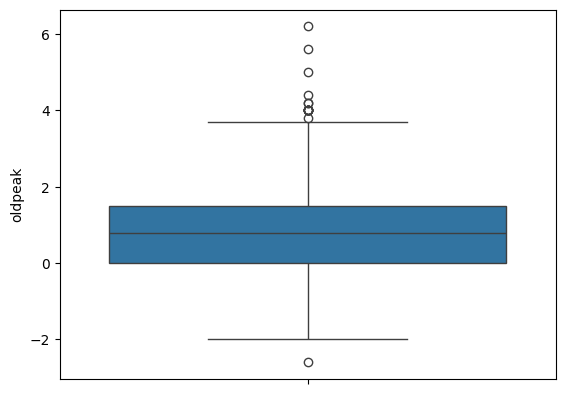

In [18]:
sns.boxplot(df['oldpeak'])

In [19]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [20]:
df['age'].value_counts()

,count
age,
54,51
58,43
55,41
56,38
57,38
52,36
51,35
62,35
59,35


In [21]:
df['sex'].value_counts()

,count
sex,
Male,718
Female,190


In [22]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


<Axes: xlabel='age', ylabel='num'>

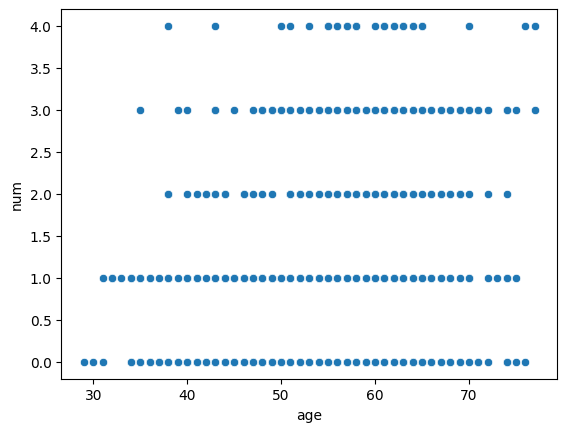

In [23]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x='age',y='num')

<Axes: xlabel='sex', ylabel='num'>

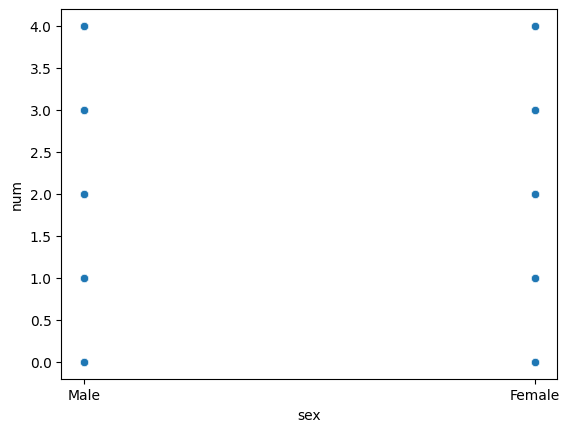

In [24]:
sns.scatterplot(data=df,x='sex',y='num')

<Axes: xlabel='cp', ylabel='num'>

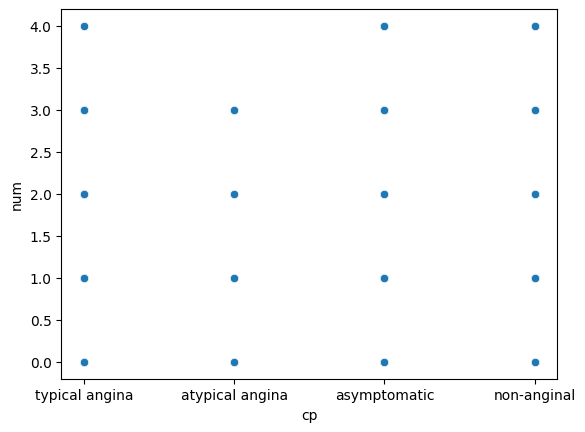

In [25]:
sns.scatterplot(data=df,x='cp',y='num')

<Axes: xlabel='trestbps', ylabel='num'>

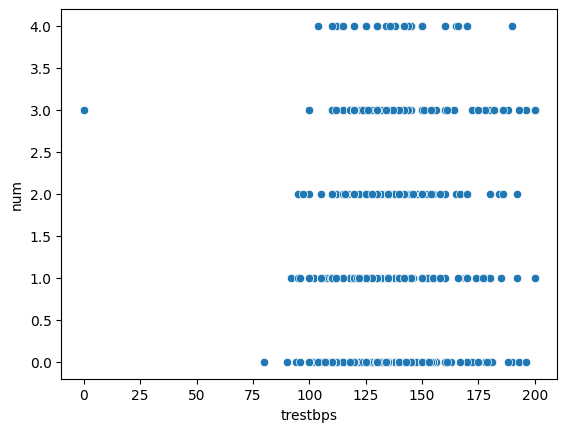

In [26]:
sns.scatterplot(data=df,x='trestbps',y='num')

<Axes: xlabel='chol', ylabel='num'>

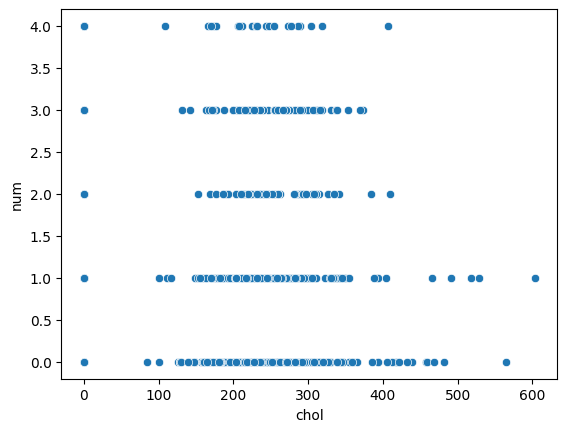

In [27]:
sns.scatterplot(data=df,x='chol',y='num')

<Axes: xlabel='fbs', ylabel='num'>

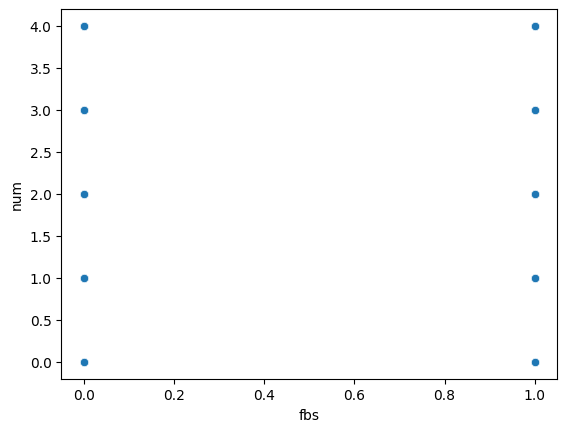

In [28]:
sns.scatterplot(data=df,x='fbs',y='num')

<Axes: xlabel='restecg', ylabel='num'>

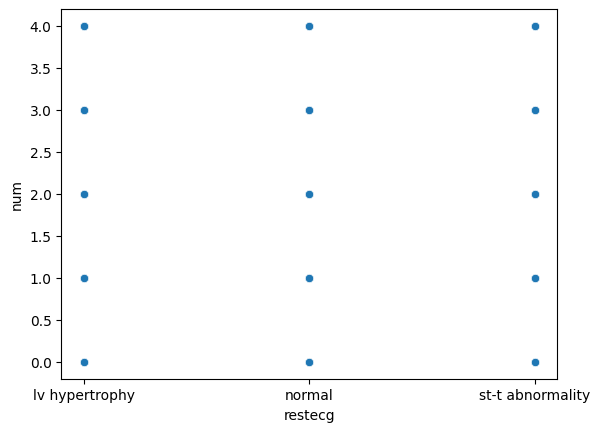

In [29]:
sns.scatterplot(data=df,x='restecg',y='num')

<Axes: xlabel='thalch', ylabel='num'>

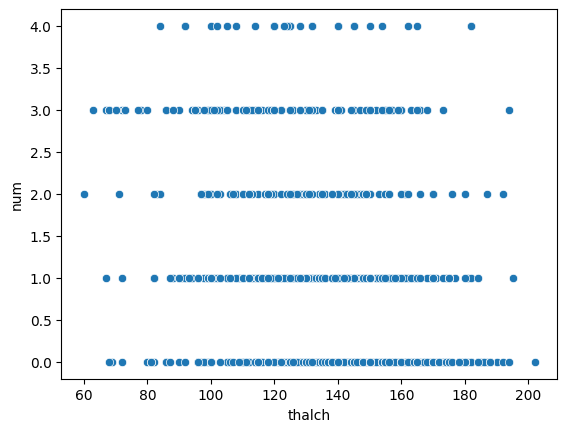

In [30]:
sns.scatterplot(data=df,x='thalch',y='num')

In [31]:
# sns.heatmap(data=df.corr(),annot=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [35]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.300000,0,0,0
1,41,1,1,135,203,False,1,132,False,0.000000,1,0,0
2,57,1,0,140,192,False,1,148,False,0.400000,1,0,0
3,52,1,3,118,186,False,0,190,False,0.000000,1,0,0
4,57,1,0,110,201,False,1,126,True,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,False,1.500000,2,0,4
904,62,1,0,166,170,False,2,120,True,3.000000,1,2,4
905,56,1,2,170,0,False,0,123,True,2.500000,0,2,4
906,56,1,2,144,208,True,2,105,True,0.891253,0,2,4


In [36]:
df.drop('sex',axis=1,inplace=True)

In [37]:
x=df.iloc[:,0:12]
y=df['num']

In [38]:
x

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,3,145,233,True,0,150,False,2.300000,0,0,0
1,41,1,135,203,False,1,132,False,0.000000,1,0,0
2,57,0,140,192,False,1,148,False,0.400000,1,0,0
3,52,3,118,186,False,0,190,False,0.000000,1,0,0
4,57,0,110,201,False,1,126,True,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,0,125,0,False,1,120,False,1.500000,2,0,4
904,62,0,166,170,False,2,120,True,3.000000,1,2,4
905,56,2,170,0,False,0,123,True,2.500000,0,2,4
906,56,2,144,208,True,2,105,True,0.891253,0,2,4


In [39]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [40]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [41]:
x_train

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
372,37,0,130,173,False,2,184,False,0.0,2,0,0
304,41,1,125,269,False,1,144,False,0.0,2,2,0
524,41,0,130,172,False,2,130,False,2.0,1,2,1
85,71,1,160,302,False,1,162,False,0.4,2,1,0
530,56,1,120,279,False,1,150,False,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
835,61,3,142,200,True,2,100,False,1.5,0,1,3
192,72,2,160,0,False,0,114,False,1.6,1,1,0
629,55,3,140,295,False,2,136,False,0.0,1,1,1
559,59,0,140,0,False,2,117,True,1.0,1,2,1


In [42]:
x_test

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
251,56,2,130,459,False,1,114,False,0.0,2,0,0
732,59,2,167,0,False,1,128,True,2.0,0,1,2
497,46,0,118,186,False,1,124,False,0.0,2,2,1
887,57,0,165,289,True,0,124,False,1.0,1,2,4
144,46,0,110,240,False,2,140,False,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
899,65,0,136,248,False,1,140,True,4.0,0,2,4
687,46,0,134,310,False,1,126,False,0.0,2,1,2
635,43,3,120,291,False,2,155,False,0.0,0,0,1
2,57,0,140,192,False,1,148,False,0.4,1,0,0


In [43]:
y_train

,num
372,0
304,0
524,1
85,0
530,1
...,...
835,3
192,0
629,1
559,1


In [44]:
y_test

,num
251,0
732,2
497,1
887,4
144,0
...,...
899,4
687,2
635,1
2,0


In [45]:
model=DecisionTreeClassifier(criterion = 'entropy',max_depth=2,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [46]:
preds=model.predict(x_test)

In [47]:
preds

array([0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 2, 2, 1, 0, 1])

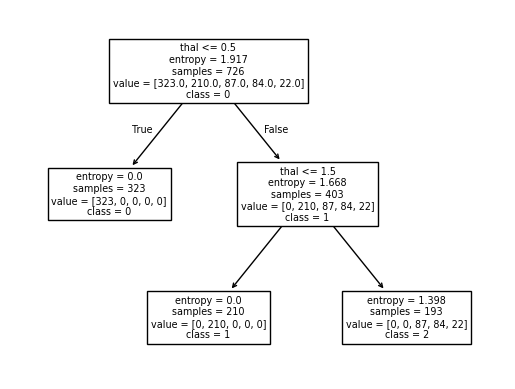

In [48]:
from sklearn import tree
fn=['age', 'sex', 'cp', 'trestbps',	'chol',	'fbs', 'restecg',	'thalch',	'exang', 'oldpeak',	'slope', 'thal'] # Feature names
cn=['0','1','2','3','4'] # Class names
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn);
              #  filled = True);

In [49]:
y_train.value_counts()

,count
num,
0,323
1,210
2,87
3,84
4,22


In [50]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts()

,count
0,76
1,55
2,51


In [51]:
model.feature_importances_#cp column is the most imp for prediction, then age then oldpeak

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [52]:
preds

array([0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 2, 2, 1, 0, 1])

In [53]:
pd.crosstab(y_test,preds)

col_0,0,1,2
num,,,
0,76,0,0
1,0,55,0
2,0,0,22
3,0,0,23
4,0,0,6


In [54]:
np.mean(preds==y_test)

np.float64(0.8406593406593407)

firstly i selected the max_depth as 3 later than i selected max_depth as 2 and also changed the criterion, this is how i have performed hyperparameter tuning

Using the sex column initially i got the accuracy as 52% but after dropping sex column i get the improved accuracy as 84%

In [55]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, preds))

R2 Score: 0.8069423129006048


Hyperparamter tuning using criterion as 'gini' and max_depth=3

In [56]:
model1=DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=0)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
preds1=model1.predict(x_test)

In [58]:
preds1

array([0, 2, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 3, 1, 1, 3, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 3, 2, 0, 0, 0, 0, 1, 0, 1,
       3, 0, 1, 3, 1, 1, 1, 0, 0, 2, 1, 3, 1, 0, 2, 2, 3, 1, 3, 3, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 1,
       1, 0, 1, 0, 0, 1, 2, 3, 3, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 3, 1, 2,
       2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 0, 3, 3, 1, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 3, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 3, 2, 1, 0, 1])

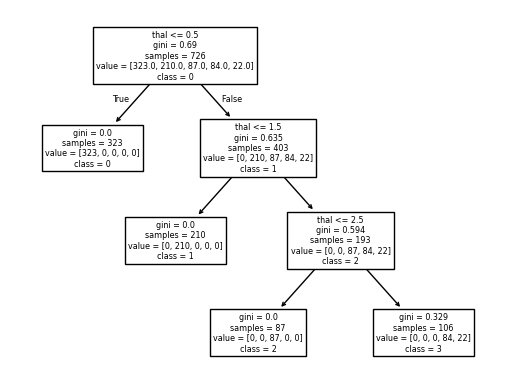

In [59]:
from sklearn import tree
fn=['age', 'sex', 'cp', 'trestbps',	'chol',	'fbs', 'restecg',	'thalch',	'exang', 'oldpeak',	'slope', 'thal'] # Feature names
cn=['0','1','2','3','4'] # Class names
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model1,
               feature_names = fn,
               class_names=cn);

In [60]:
#Predicting on test data
preds1 = model1.predict(x_test) # predicting on test data set
pd.Series(preds1).value_counts()

,count
0,76
1,55
3,29
2,22


In [61]:
model1.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [62]:
pd.crosstab(y_test,preds1)

col_0,0,1,2,3
num,,,,
0,76,0,0,0
1,0,55,0,0
2,0,0,22,0
3,0,0,0,23
4,0,0,0,6


In [63]:
np.mean(preds1==y_test)

np.float64(0.967032967032967)

In [64]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, preds1))

R2 Score: 0.9753543378170985


After Hypertuning of criterion as gini and max_depth as 3 model got very much improvised accuracy.

# **GridSearch Algorithm**

In [69]:
param_grid = {
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [70]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross-validation
                           scoring='accuracy', # metric to optimize
                           n_jobs=-1)

In [71]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [72]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [73]:
grid_search.best_score_

np.float64(1.0)

In [74]:
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(x_test)

In [78]:
accuracy_score(y_test, preds)#Test Accuracy

0.8406593406593407

[Text(0.2857142857142857, 0.9, 'num <= 0.5\ngini = 0.69\nsamples = 726\nvalue = [323.0, 210.0, 87.0, 84.0, 22.0]\nclass = 0'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 323\nvalue = [323, 0, 0, 0, 0]\nclass = 0'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'num <= 1.5\ngini = 0.635\nsamples = 403\nvalue = [0, 210, 87, 84, 22]\nclass = 1'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 210\nvalue = [0, 210, 0, 0, 0]\nclass = 1'),
 Text(0.5714285714285714, 0.5, 'num <= 2.5\ngini = 0.594\nsamples = 193\nvalue = [0, 0, 87, 84, 22]\nclass = 2'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 87\nvalue = [0, 0, 87, 0, 0]\nclass = 2'),
 Text(0.7142857142857143, 0.3, 'num <= 3.5\ngini = 0.329\nsamples = 106\nvalue = [0, 0, 0, 84, 22]\nclass = 3'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 84\nvalue = [0, 0, 0, 84, 0]\nclass = 3'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsampl

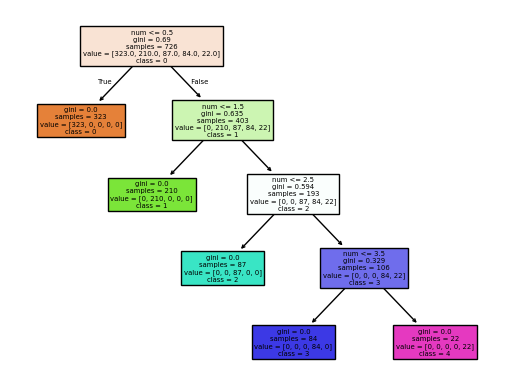

In [79]:
tree.plot_tree(best_tree, feature_names=x.columns, class_names=['0','1','2','3','4'], filled=True)

# **Interview Questions:**

# **1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

1. max_depth

Description: Maximum depth of the tree.

Effect:

Smaller max_depth → simpler tree → may underfit the data.

Larger max_depth → more complex tree → may overfit the training data.

2. min_samples_split

Description: Minimum number of samples required to split an internal node.

Effect:

Higher value → fewer splits → simpler tree → reduces overfitting.

Lower value → more splits → complex tree → may overfit.

3. max_features

Description: Maximum number of features considered for splitting at each node.

Effect:

Smaller number → more randomness → can reduce overfitting (used in Random Forest).

Larger number → model considers more features → potentially higher accuracy but risk of overfitting.

4. criterion

Description: Function to measure the quality of a split. Common options:

"gini" → Gini impurity

"entropy" → Information gain

# **2. What is the difference between the Label encoding and One-hot encoding?**

Label Encoding and One-Hot Encoding are two common techniques used to convert categorical variables into numerical form for machine learning models. Label Encoding assigns a unique integer value to each category, effectively converting the categorical column into a single numeric column. This method is suitable for ordinal categorical data, where the order of categories carries meaning, such as Low, Medium, and High. However, using Label Encoding for nominal data can be problematic, as it may incorrectly imply an order between categories, which can mislead algorithms like Linear Regression. On the other hand, One-Hot Encoding creates separate binary columns for each category, indicating the presence or absence of that category with 1s and 0s. This method is ideal for nominal categorical data, where there is no inherent order, such as Red, Blue, or Green. While One-Hot Encoding increases the dimensionality of the dataset, it prevents algorithms from assuming a false ordinal relationship among categories. Tree-based models, such as Decision Trees and Random Forests, can work with Label Encoded features effectively, but models like Linear Regression, Logistic Regression, and Neural Networks generally require One-Hot Encoding for proper performance.